In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns 

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_16076\60504849.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [3]:
data = pd.read_csv('Customer-Churn.txt')

In [4]:
#Read that data into Python and call the dataframe `churnData`.

In [5]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [7]:
#Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. 
#Convert this column into numeric type using `pd.to_numeric` function.

In [8]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [10]:
#Check for null values in the dataframe. Replace the null values.

In [11]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,gender,0.000000
1,SeniorCitizen,0.000000
2,Partner,0.000000
3,Dependents,0.000000
4,tenure,0.000000
5,PhoneService,0.000000
6,OnlineSecurity,0.000000
7,OnlineBackup,0.000000
8,DeviceProtection,0.000000
9,TechSupport,0.000000


In [12]:
print(data['TotalCharges'].value_counts())

TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64


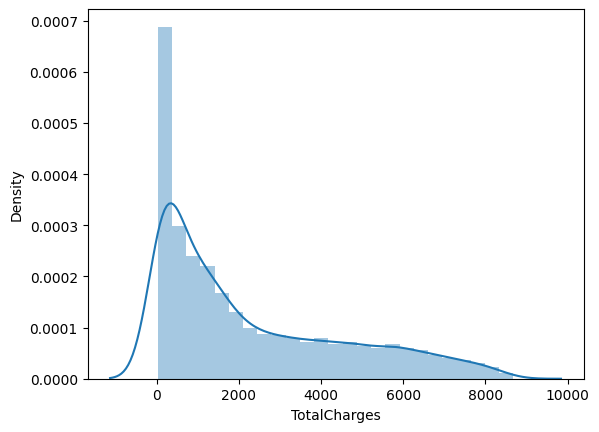

In [13]:
sns.distplot(data['TotalCharges']) 
plt.show()

In [14]:
data['TotalCharges'].fillna(data['TotalCharges'].mode()[0], inplace=True)

In [15]:
print(data['TotalCharges'].value_counts())

TotalCharges
20.20      22
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64


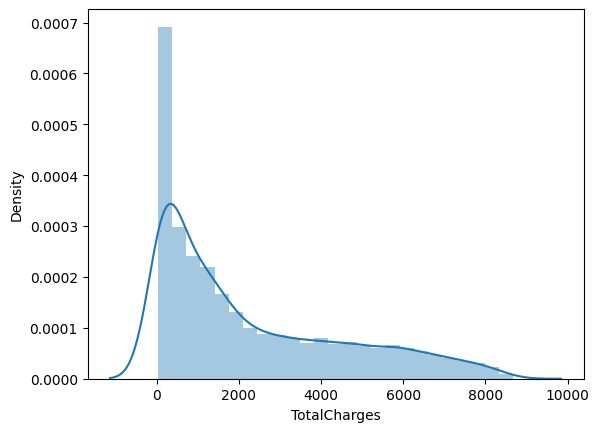

In [16]:
sns.distplot(data['TotalCharges']) 
plt.show()

In [17]:
#Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  #Scale the features either by using normalizer or a standard scaler.
  #Split the data into a training set and a test set.
  #Fit a logistic regression model on the training data.
  #Check the accuracy on the test data.

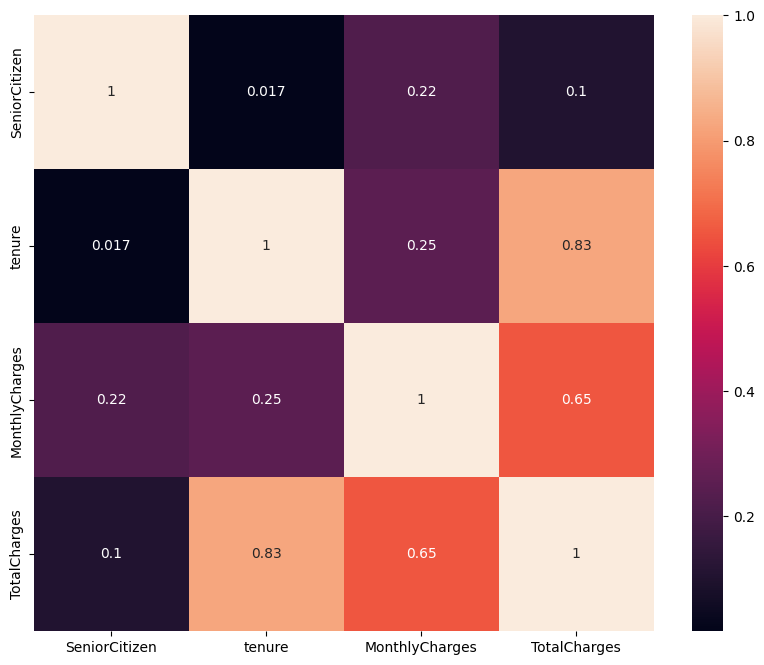

In [18]:
data_corr = data.select_dtypes(np.number)
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [19]:
numericals = data.select_dtypes(np.number)

In [20]:
from sklearn.preprocessing import StandardScaler #estandarizar, definirlo en un rango concreto.
optimusprime=StandardScaler().fit(numericals)
numericals_standardized=optimusprime.transform(numericals)
print(numericals_standardized)

[[-0.43991649 -1.27744458 -1.16032292 -0.99263828]
 [-0.43991649  0.06632742 -0.25962894 -0.17218103]
 [-0.43991649 -1.23672422 -0.36266036 -0.95809317]
 ...
 [-0.43991649 -0.87024095 -1.1686319  -0.85295782]
 [ 2.27315869 -1.15528349  0.32033821 -0.8705392 ]
 [-0.43991649  1.36937906  1.35896134  2.0139108 ]]


In [21]:
num_data_standardized = pd.DataFrame(numericals_standardized)

In [22]:
num_data_standardized

,0,1,2,3
0,-0.439916,-1.277445,-1.160323,-0.992638
1,-0.439916,0.066327,-0.259629,-0.172181
2,-0.439916,-1.236724,-0.362660,-0.958093
3,-0.439916,0.514251,-0.746535,-0.193689
4,-0.439916,-1.236724,0.197365,-0.938901
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.127621
7039,-0.439916,1.613701,1.277533,2.242623
7040,-0.439916,-0.870241,-1.168632,-0.852958
7041,2.273159,-1.155283,0.320338,-0.870539


In [23]:
num_data_standardized.rename(columns={0: 'SeniorCitizen', 1: 'tenure', 2: 'MonthlyCharges', 3: 'TotalCharges'}, inplace=True)

In [24]:
num_data_standardized

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.992638
1,-0.439916,0.066327,-0.259629,-0.172181
2,-0.439916,-1.236724,-0.362660,-0.958093
3,-0.439916,0.514251,-0.746535,-0.193689
4,-0.439916,-1.236724,0.197365,-0.938901
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.127621
7039,-0.439916,1.613701,1.277533,2.242623
7040,-0.439916,-0.870241,-1.168632,-0.852958
7041,2.273159,-1.155283,0.320338,-0.870539


In [25]:
columns_to_standardize = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Asignar las columnas estandarizadas al DataFrame original
for column in columns_to_standardize:
    data[column] = num_data_standardized[column]

# Mostrar el DataFrame actualizado
print("\nDataFrame Actualizado con Columnas Estandarizadas:")
print(data)


DataFrame Actualizado con Columnas Estandarizadas:
      gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
0     Female      -0.439916     Yes         No -1.277445           No   
1       Male      -0.439916      No         No  0.066327          Yes   
2       Male      -0.439916      No         No -1.236724          Yes   
3       Male      -0.439916      No         No  0.514251           No   
4     Female      -0.439916      No         No -1.236724          Yes   
...      ...            ...     ...        ...       ...          ...   
7038    Male      -0.439916     Yes        Yes -0.340876          Yes   
7039  Female      -0.439916     Yes        Yes  1.613701          Yes   
7040  Female      -0.439916     Yes        Yes -0.870241           No   
7041    Male       2.273159     Yes         No -1.155283          Yes   
7042    Male      -0.439916      No         No  1.369379          Yes   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport Streaming

In [26]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,-0.439916,Yes,No,-1.277445,No,No,Yes,No,No,No,No,Month-to-month,-1.160323,-0.992638,No
1,Male,-0.439916,No,No,0.066327,Yes,Yes,No,Yes,No,No,No,One year,-0.259629,-0.172181,No
2,Male,-0.439916,No,No,-1.236724,Yes,Yes,Yes,No,No,No,No,Month-to-month,-0.362660,-0.958093,Yes
3,Male,-0.439916,No,No,0.514251,No,Yes,No,Yes,Yes,No,No,One year,-0.746535,-0.193689,No
4,Female,-0.439916,No,No,-1.236724,Yes,No,No,No,No,No,No,Month-to-month,0.197365,-0.938901,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,-0.439916,Yes,Yes,-0.340876,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,0.665992,-0.127621,No
7039,Female,-0.439916,Yes,Yes,1.613701,Yes,No,Yes,Yes,No,Yes,Yes,One year,1.277533,2.242623,No
7040,Female,-0.439916,Yes,Yes,-0.870241,No,Yes,No,No,No,No,No,Month-to-month,-1.168632,-0.852958,No
7041,Male,2.273159,Yes,No,-1.155283,Yes,No,No,No,No,No,No,Month-to-month,0.320338,-0.870539,Yes


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(4), object(12)
memory usage: 88

In [28]:
data.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [29]:
data=pd.get_dummies(data, columns=['gender'], drop_first=True)

In [30]:
data.Partner.value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [31]:
data=pd.get_dummies(data, columns=['Partner'], drop_first=True)

In [32]:
data.Dependents.value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [33]:
data=pd.get_dummies(data, columns=['Dependents'], drop_first=True)

In [34]:
data.PhoneService.value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [35]:
data=pd.get_dummies(data, columns=['PhoneService'], drop_first=True)

In [36]:
data.OnlineSecurity.value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [37]:
data=pd.get_dummies(data, columns=['OnlineSecurity'], drop_first=True)

In [38]:
data.OnlineBackup.value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [39]:
data['OnlineBackup'] = data['OnlineBackup'].replace('No internet service', 'No')

In [40]:
data.OnlineBackup.value_counts()

OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

In [41]:
data=pd.get_dummies(data, columns=['OnlineBackup'], drop_first=True)

In [42]:
data.DeviceProtection.value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [43]:
data['DeviceProtection'] = data['DeviceProtection'].replace('No internet service', 'No')

In [44]:
data.DeviceProtection.value_counts()

DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

In [45]:
data=pd.get_dummies(data, columns=['DeviceProtection'], drop_first=True)

In [46]:
data.TechSupport.value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [47]:
data['TechSupport'] = data['TechSupport'].replace('No internet service', 'No')

In [48]:
data.TechSupport.value_counts()

TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

In [49]:
data=pd.get_dummies(data, columns=['TechSupport'], drop_first=True)

In [50]:
data.StreamingTV.value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [51]:
data['StreamingTV'] = data['StreamingTV'].replace('No internet service', 'No')

In [52]:
data.StreamingTV.value_counts()

StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64

In [53]:
data=pd.get_dummies(data, columns=['StreamingTV'], drop_first=True)

In [54]:
data.StreamingMovies.value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [55]:
data['StreamingMovies'] = data['StreamingMovies'].replace('No internet service', 'No')

In [56]:
data.StreamingMovies.value_counts()

StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64

In [57]:
data=pd.get_dummies(data, columns=['StreamingMovies'], drop_first=True)

In [58]:
data.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [59]:
data['Contract'] = data['Contract'].replace({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

In [60]:
data.Contract.value_counts()

Contract
0    3875
2    1695
1    1473
Name: count, dtype: int64

In [61]:
data.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [62]:
data=pd.get_dummies(data, columns=['Churn'], drop_first=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SeniorCitizen                       7043 non-null   float64
 1   tenure                              7043 non-null   float64
 2   Contract                            7043 non-null   int64  
 3   MonthlyCharges                      7043 non-null   float64
 4   TotalCharges                        7043 non-null   float64
 5   gender_Male                         7043 non-null   bool   
 6   Partner_Yes                         7043 non-null   bool   
 7   Dependents_Yes                      7043 non-null   bool   
 8   PhoneService_Yes                    7043 non-null   bool   
 9   OnlineSecurity_No internet service  7043 non-null   bool   
 10  OnlineSecurity_Yes                  7043 non-null   bool   
 11  OnlineBackup_Yes                    7043 no

In [64]:
data = data.drop(['OnlineSecurity_No internet service'], axis=1)
data.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Churn_Yes
0,-0.439916,-1.277445,0,-1.160323,-0.992638,False,True,False,False,False,True,False,False,False,False,False
1,-0.439916,0.066327,1,-0.259629,-0.172181,True,False,False,True,True,False,True,False,False,False,False
2,-0.439916,-1.236724,0,-0.362660,-0.958093,True,False,False,True,True,True,False,False,False,False,True
3,-0.439916,0.514251,1,-0.746535,-0.193689,True,False,False,False,True,False,True,True,False,False,False
4,-0.439916,-1.236724,0,0.197365,-0.938901,False,False,False,True,False,False,False,False,False,False,True


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SeniorCitizen         7043 non-null   float64
 1   tenure                7043 non-null   float64
 2   Contract              7043 non-null   int64  
 3   MonthlyCharges        7043 non-null   float64
 4   TotalCharges          7043 non-null   float64
 5   gender_Male           7043 non-null   bool   
 6   Partner_Yes           7043 non-null   bool   
 7   Dependents_Yes        7043 non-null   bool   
 8   PhoneService_Yes      7043 non-null   bool   
 9   OnlineSecurity_Yes    7043 non-null   bool   
 10  OnlineBackup_Yes      7043 non-null   bool   
 11  DeviceProtection_Yes  7043 non-null   bool   
 12  TechSupport_Yes       7043 non-null   bool   
 13  StreamingTV_Yes       7043 non-null   bool   
 14  StreamingMovies_Yes   7043 non-null   bool   
 15  Churn_Yes            

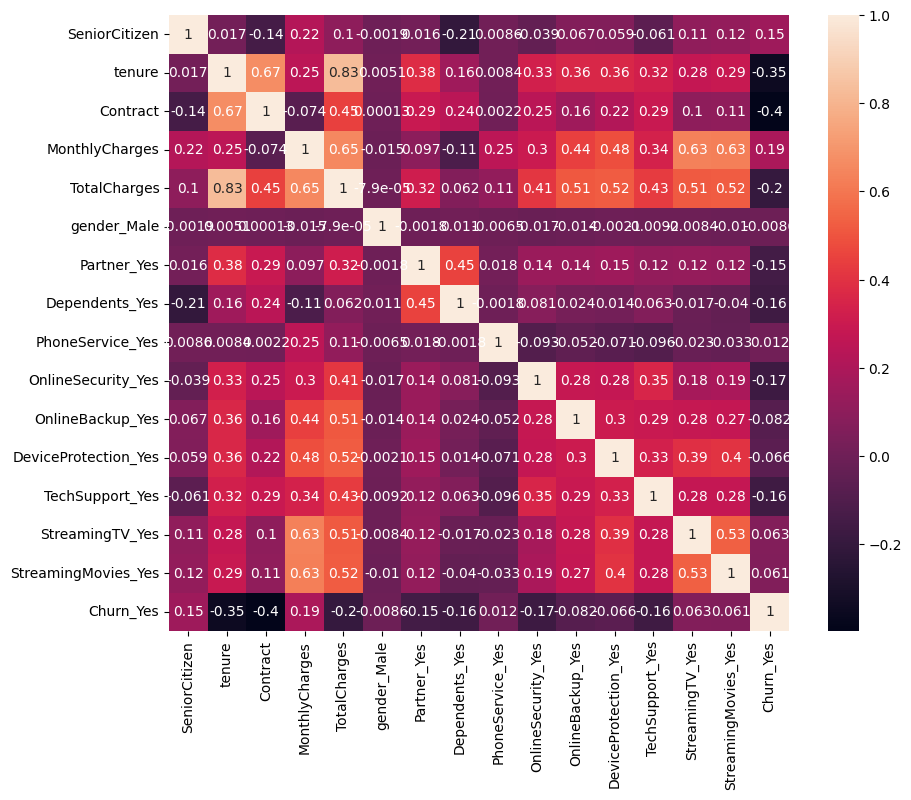

In [66]:
corr_matrix=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [67]:
#Split the data into a training set and a test set.

In [68]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [69]:
X = data.drop(columns = "Churn_Yes")
y = data.Churn_Yes

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [71]:
lm=linear_model.LinearRegression()
modelo=lm.fit(X_train, y_train)

In [72]:
predictions=lm.predict(X_test)

In [73]:
mse=mean_squared_error(y_test, predictions)
print(mse)

0.13961378536400432


In [74]:
import math

In [75]:
rmse=math.sqrt(mse)
print(rmse)

0.3736492812304131


In [76]:
r2=r2_score(y_test, predictions)
print(r2)

0.26068228256923187


In [77]:
#Fit a logistic regression model on the training data.

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
X = data.drop(columns = "Churn_Yes")
y = data.Churn_Yes

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [81]:
logreg = LogisticRegression()

In [82]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [83]:
y_pred = logreg.predict(X_test)

In [84]:
#Check the accuracy on the test data.

In [85]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7998225377107364
Confusion Matrix:
[[3686  436]
 [ 692  821]]
Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.89      0.87      4122
        True       0.65      0.54      0.59      1513

    accuracy                           0.80      5635
   macro avg       0.75      0.72      0.73      5635
weighted avg       0.79      0.80      0.79      5635



In [86]:
#Check for the imbalance.

In [87]:
data.Churn_Yes.value_counts()

Churn_Yes
False    5174
True     1869
Name: count, dtype: int64

In [88]:
data['Churn_Yes'] = data['Churn_Yes'].replace({
    False: 0,
    True: 1
})

In [89]:
data.Churn_Yes.value_counts()

Churn_Yes
0    5174
1    1869
Name: count, dtype: int64

In [90]:
#Use the resampling strategies used in class for upsampling and downsampling 
#to create a balance between the two classes.

In [91]:
down_category_0 = data[data['Churn_Yes'] == 0]
down_category_1 = data[data['Churn_Yes'] == 1]

In [92]:
down_category_0 = down_category_0.sample(len(down_category_1))
print(down_category_0.shape)
print(down_category_1.shape)

(1869, 16)
(1869, 16)


In [93]:
data_down = pd.concat([down_category_0, down_category_1], axis=0)
#shuffling the data
data_down = data_down.sample(frac=1)
data_down['Churn_Yes'].value_counts()

Churn_Yes
1    1869
0    1869
Name: count, dtype: int64

In [94]:
X = data_down.drop(columns = "Churn_Yes")
y = data_down.Churn_Yes

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [96]:
logreg = LogisticRegression()

In [97]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [98]:
y_pred = logreg.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.753259779338014
Confusion Matrix:
[[1021  466]
 [ 272 1232]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.73      1487
           1       0.73      0.82      0.77      1504

    accuracy                           0.75      2991
   macro avg       0.76      0.75      0.75      2991
weighted avg       0.76      0.75      0.75      2991



In [ ]:
#Con downsizing mi accuracy ha bajado.

In [100]:
up_category_0 = data[data['Churn_Yes'] == 0]
up_category_1 = data[data['Churn_Yes'] == 1]

In [101]:
up_category_1 = up_category_1.sample(len(up_category_0), replace=True)
print(up_category_1.shape)

(5174, 16)


In [102]:
data_up = pd.concat([up_category_0, up_category_1], axis=0)
#shuffling the data
data_up = data_up.sample(frac=1)
data_up['Churn_Yes'].value_counts()

Churn_Yes
1    5174
0    5174
Name: count, dtype: int64

In [103]:
X = data_up.drop(columns = "Churn_Yes")
y = data_up.Churn_Yes

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [105]:
logreg = LogisticRegression()

In [106]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [107]:
y_pred = logreg.predict(X_test)

In [108]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7667592704432903
Confusion Matrix:
[[3063 1078]
 [ 853 3285]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      4141
           1       0.75      0.79      0.77      4138

    accuracy                           0.77      8279
   macro avg       0.77      0.77      0.77      8279
weighted avg       0.77      0.77      0.77      8279



In [ ]:
#con upsizing mi accuracy ha mejorado respecto a downsizing, pero sigue por debajo del modelo original